In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_layout(layout: str) -> None:
    """Initialize the layout of candidates."""

    if layout == 'openpose':
        num_node = 18
        inward = [(4, 3), (3, 2), (7, 6), (6, 5), (13, 12), (12, 11),
                        (10, 9), (9, 8), (11, 5), (8, 2), (5, 1), (2, 1),
                        (0, 1), (15, 0), (14, 0), (17, 15), (16, 14)]
        center = 1
    elif layout == 'human3.6m':
        num_node = 17
        inward = [(10, 9), (9, 8), (8,7), (7,0), (13, 12), (12, 11), (11, 8),
                  (16, 15), (15, 14), (14, 8),
                  (13, 12), (12, 11), (11, 8),
                  (3, 2), (2,1), (1,0),
                  (6,5), (5,4), (4,0)]
        center = 0
    elif layout == 'nturgb+d':
        num_node = 25
        neighbor_base = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
                            (7, 6), (8, 7), (9, 21), (10, 9), (11, 10),
                            (12, 11), (13, 1), (14, 13), (15, 14), (16, 15),
                            (17, 1), (18, 17), (19, 18), (20, 19), (22, 8),
                            (23, 8), (24, 12), (25, 12)]
        inward = [(i - 1, j - 1) for (i, j) in neighbor_base]
        center = 21 - 1
    elif layout == 'coco':
        num_node = 17
        inward = [(15, 13), (13, 11), (16, 14), (14, 12), (11, 5),
                        (12, 6), (9, 7), (7, 5), (10, 8), (8, 6), (5, 0),
                        (6, 0), (1, 0), (3, 1), (2, 0), (4, 2)]
        center = 0
    elif isinstance(layout, dict):
        num_node = layout['num_node']
        inward = layout['inward']
        center = layout['center']
    else:
        raise ValueError(f'Do Not Exist This Layout: {layout}')
    return num_node, inward, center

In [3]:
with open('./NTU/ntu60_2d.pkl', 'rb') as f:
    ntu60_2d = pickle.load(f)

with open('./NTU/ntu60_3d.pkl', 'rb') as f:
    ntu60_3d = pickle.load(f)

with open('./NTU/ntu60_3d_converted.pkl', 'rb') as f:
    ntu60_3d_converted = pickle.load(f)

with open('./InfAct_plus/2d/primitive/InfAct_plus.pkl', 'rb') as f:
    InfAct_2d = pickle.load(f)

with open('./InfAct_plus/3d/primitive/InfAct_plus.pkl', 'rb') as f:
    InfAct_3d = pickle.load(f)

# NTU 2D

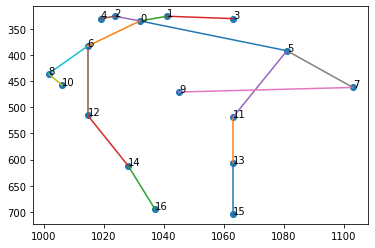

In [4]:
sample_2d = ntu60_2d['annotations'][0]['keypoint'][0,0]
num_nodes, inward, center = get_layout('coco')
assert sample_2d.shape[0] == num_nodes
Xs = sample_2d[:,0]
Ys = sample_2d[:,1]
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.scatter(Xs, Ys)
for i, joint in enumerate(sample_2d):
    ax.annotate(xy=joint, text=i)
for bone in inward:
    ax.plot((Xs[bone[0]], Xs[bone[1]]), (Ys[bone[0]], Ys[bone[1]]))

# InfAct 2d

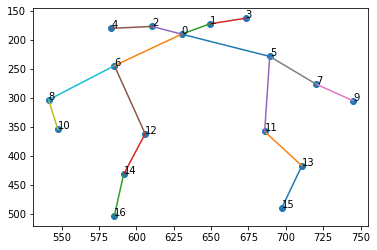

In [5]:
sample_2d = InfAct_2d['annotations'][400]['keypoint'][0,0]
num_nodes, inward, center = get_layout('coco')
assert sample_2d.shape[0] == num_nodes
Xs = sample_2d[:,0]
Ys = sample_2d[:,1]
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.scatter(Xs, Ys)
for i, joint in enumerate(sample_2d):
    ax.annotate(xy=joint, text=i)
for bone in inward:
    ax.plot((Xs[bone[0]], Xs[bone[1]]), (Ys[bone[0]], Ys[bone[1]]))

# NTU 3D

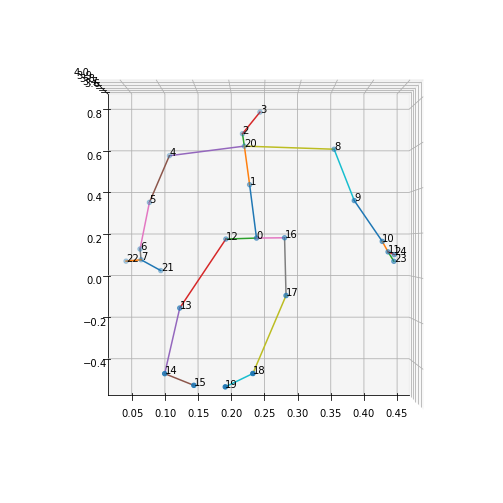

In [6]:
sample_3d = ntu60_3d['annotations'][100]['keypoint'][0,0]
num_nodes, inward, center = get_layout('nturgb+d')
assert sample_3d.shape[0] == num_nodes
Xs = sample_3d[:,0]
Ys = sample_3d[:,1]
Zs = sample_3d[:,2]
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xs, Ys, Zs)
for i, joint in enumerate(sample_3d):
    ax.text(x=joint[0], y=joint[1], z=joint[2],  s=f'{i}') 
for bone in inward:
    ax.plot((Xs[bone[0]], Xs[bone[1]]), (Ys[bone[0]], Ys[bone[1]]), (Zs[bone[0]], Zs[bone[1]]))
ax.view_init(elev=90, azim=-90, roll=0)

# InfAct 3D

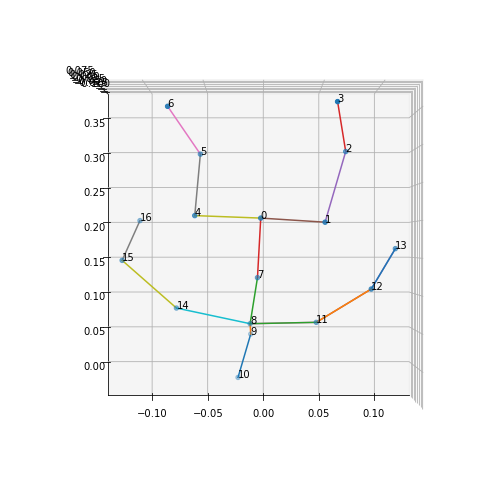

In [7]:
sample_3d = InfAct_3d['annotations'][400]['keypoint'][0,0]
num_nodes, inward, center = get_layout('human3.6m')
assert sample_3d.shape[0] == num_nodes
Xs = sample_3d[:,0]
Ys = sample_3d[:,1]
Zs = sample_3d[:,2]
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xs, Ys, Zs)
for i, joint in enumerate(sample_3d):
    ax.text(x=joint[0], y=joint[1], z=joint[2],  s=f'{i}') 
for bone in inward:
    ax.plot((Xs[bone[0]], Xs[bone[1]]), (Ys[bone[0]], Ys[bone[1]]), (Zs[bone[0]], Zs[bone[1]]))
ax.view_init(elev=90, azim=-90, roll=0)

# NTU 3d Converted

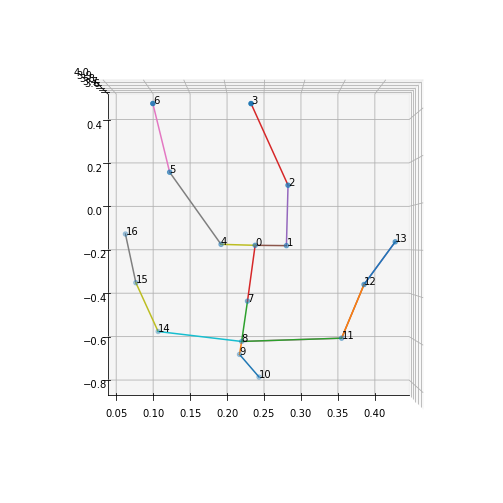

In [8]:
sample_3d = ntu60_3d_converted['annotations'][100]['keypoint'][0,0]
num_nodes, inward, center = get_layout('human3.6m')
assert sample_3d.shape[0] == num_nodes
Xs = sample_3d[:,0]
Ys = sample_3d[:,1]
Zs = sample_3d[:,2]
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(Xs, Ys, Zs)
for i, joint in enumerate(sample_3d):
    ax.text(x=joint[0], y=joint[1], z=joint[2],  s=f'{i}') 
for bone in inward:
    ax.plot((Xs[bone[0]], Xs[bone[1]]), (Ys[bone[0]], Ys[bone[1]]), (Zs[bone[0]], Zs[bone[1]]))
ax.view_init(elev=90, azim=-90, roll=0)